In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as st
from sklearn.model_selection import train_test_split,KFold,StratifiedKFold,GridSearchCV,RandomizedSearchCV,cross_val_score
from sklearn.ensemble import RandomForestClassifier,BaggingClassifier,AdaBoostClassifier,GradientBoostingClassifier,RandomForestRegressor,BaggingRegressor,AdaBoostRegressor,GradientBoostingRegressor
from sklearn.linear_model import LinearRegression,LogisticRegression,Lasso, Ridge
from sklearn.tree import DecisionTreeClassifier,DecisionTreeRegressor
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier,KNeighborsRegressor
import sklearn.metrics as metrics
from sklearn.metrics import r2_score,roc_auc_score,classification_report,mean_squared_error,accuracy_score,confusion_matrix
import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv('D:\datasets+minipro\heart.csv')

In [3]:
df.shape

(303, 14)

In [4]:
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [5]:
df.head(1)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1


In [6]:
df1=df.copy()

In [7]:
#set seed for same results everytime
seed=0
import sklearn.ensemble as ensemble
import sklearn.metrics as metrics

X=df.drop('target',1)
y=df['target']
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state =1)

#declare the models
lr = LogisticRegression()
rf=RandomForestClassifier()
adb=ensemble.AdaBoostClassifier()
bgc=ensemble.BaggingClassifier()
gnb = GaussianNB()
knn=KNeighborsClassifier()
dt = DecisionTreeClassifier()
# ab_rf = AdaBoostClassifier(base_estimator=rf,random_state=0)
# ab_dt = AdaBoostClassifier(base_estimator=dt,random_state=0)
# ab_nb=  AdaBoostClassifier(base_estimator=gnb,random_state=0)
# ab_lr=  AdaBoostClassifier(base_estimator=lr,random_state=0)
bgcl_lr = BaggingClassifier(base_estimator=lr, random_state=0)

# ,ab_rf,ab_dt,ab_nb,ab_lr,bgcl_lr

models=[lr,rf,adb,bgc,gnb,knn,dt,bgcl_lr]
sctr,scte,auc,ps,rs=[],[],[],[],[]
def ens(X_train,X_test, y_train, y_test):
    for model in models:
            model.fit(X_train, y_train)
            y_test_pred = model.predict(X_test)
            y_test_pred_new=model.predict_proba(X_test)
            y_test_pred_new=y_test_pred_new[:,1]
            train_score=model.score(X_train,y_train)
            test_score=model.score(X_test,y_test)
            p_score=metrics.precision_score(y_test,y_test_pred)
            r_score=metrics.recall_score(y_test,y_test_pred)
            
            ac=metrics.roc_auc_score(y_test,y_test_pred_new)
            
            sctr.append(train_score)
            scte.append(test_score)
            ps.append(p_score)
            rs.append(r_score)
            auc.append(ac)
    return sctr,scte,auc,ps,rs
ens(X_train,X_test, y_train, y_test)
# 'ab_rf','ab_dt','ab_nb','ab_lr','bgcl_lr'
ensemble=pd.DataFrame({'names':['Logistic Regression','Random Forest','Ada boost','Bagging',
                                'Naive-Bayes','KNN','Decistion Tree',
                                'bagged LR'],
                       'auc_score':auc,'training':sctr,'testing':scte,'precision':ps,'recall':rs})
ensemble=ensemble.sort_values(by='auc_score',ascending=False).reset_index(drop=True)
ensemble

,names,auc_score,training,testing,precision,recall
0,Random Forest,0.856452,1.000000,0.754098,0.735294,0.806452
1,Naive-Bayes,0.849462,0.855372,0.770492,0.757576,0.806452
2,Logistic Regression,0.836559,0.867769,0.770492,0.729730,0.870968
3,bagged LR,0.836559,0.888430,0.754098,0.722222,0.838710
4,Bagging,0.810753,0.991736,0.688525,0.676471,0.741935
5,Ada boost,0.788172,0.938017,0.672131,0.677419,0.677419
6,Decistion Tree,0.687634,1.000000,0.688525,0.676471,0.741935
7,KNN,0.625269,0.776860,0.573770,0.567568,0.677419


In [8]:
lr=LogisticRegression()

In [9]:
lr.fit(X,y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

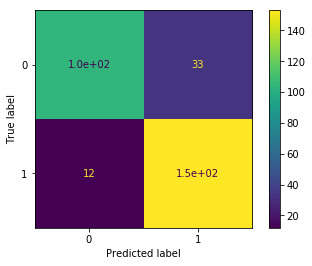

In [10]:
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(lr,X,y)

In [11]:
### Create a Pickle file using serialization 
import pickle
pickle_out = open("lr.pkl","wb")
pickle.dump(lr, pickle_out)
pickle_out.close()

In [14]:
df.columns.tolist()

['age',
 'sex',
 'cp',
 'trestbps',
 'chol',
 'fbs',
 'restecg',
 'thalach',
 'exang',
 'oldpeak',
 'slope',
 'ca',
 'thal',
 'target']

In [21]:
for i in df.columns.tolist():
    print(f"""<input type="text" name="{i}" placeholder="{i}" required="required" />""")

<input type="text" name="age" placeholder="age" required="required" />
<input type="text" name="sex" placeholder="sex" required="required" />
<input type="text" name="cp" placeholder="cp" required="required" />
<input type="text" name="trestbps" placeholder="trestbps" required="required" />
<input type="text" name="chol" placeholder="chol" required="required" />
<input type="text" name="fbs" placeholder="fbs" required="required" />
<input type="text" name="restecg" placeholder="restecg" required="required" />
<input type="text" name="thalach" placeholder="thalach" required="required" />
<input type="text" name="exang" placeholder="exang" required="required" />
<input type="text" name="oldpeak" placeholder="oldpeak" required="required" />
<input type="text" name="slope" placeholder="slope" required="required" />
<input type="text" name="ca" placeholder="ca" required="required" />
<input type="text" name="thal" placeholder="thal" required="required" />
<input type="text" name="target" pl

In [22]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
